In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# Explore Data & Change Column Name

In [5]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [7]:
df.shape

(96, 4)

In [8]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [9]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [11]:
df = df.rename({"Life expectancy at birth (years)":"LEABY"}, axis='columns')
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


# GDP & LEABY Distribution Graph

<Figure size 576x432 with 0 Axes>

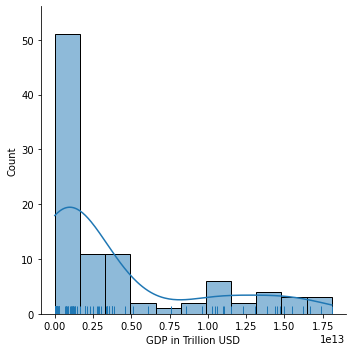

In [23]:
plt.figure(figsize=(8,6))
sns.displot(df.GDP, rug=True, kde=True)
plt.xlabel("GDP in Trillion USD");


<Figure size 576x432 with 0 Axes>

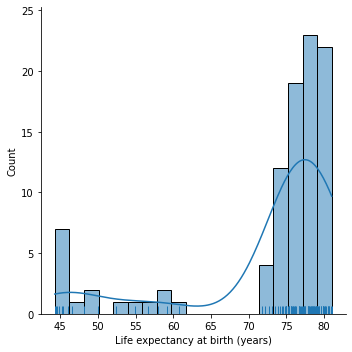

In [24]:
plt.figure(figsize=(8,6))
sns.displot(df.LEABY, rug=True, kde=True)
plt.xlabel("Life expectancy at birth (years)");

# Mean GDP and LEABY by Country

In [27]:
DFMeans = df.drop("Year", axis=1).groupby("Country").mean().reset_index()
DFMeans

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


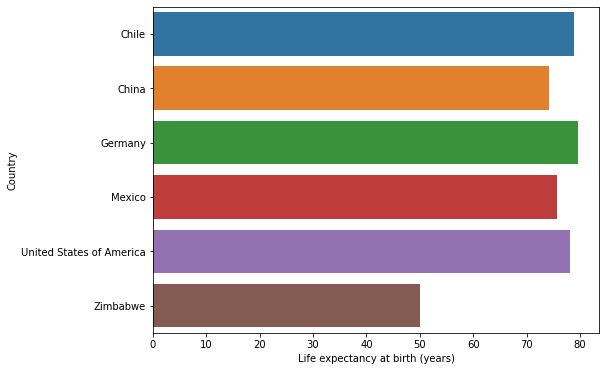

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(data=DFMeans, y="Country", x="LEABY")
plt.xlabel("Life expectancy at birth (years)");

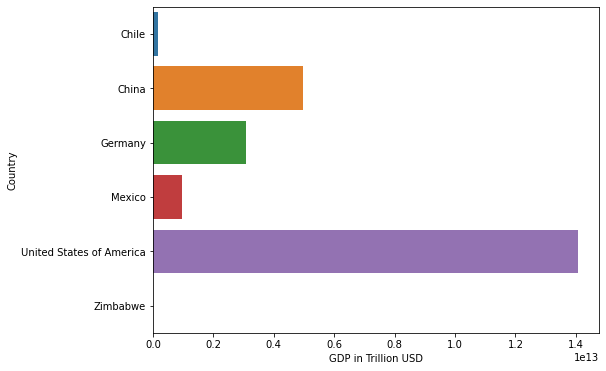

In [32]:
plt.figure(figsize=(8,6))
sns.barplot(data=DFMeans, y="Country", x="GDP")
plt.xlabel("GDP in Trillion USD");

# Comparing GDP & LEABY per Year

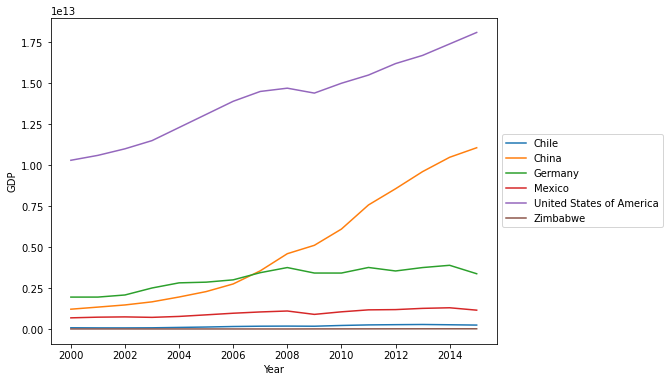

In [37]:
plt.figure(figsize=(8,6))
sns.lineplot(hue=df.Country, x=df.Year, y=df.GDP)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xlabel('GDP per Year');

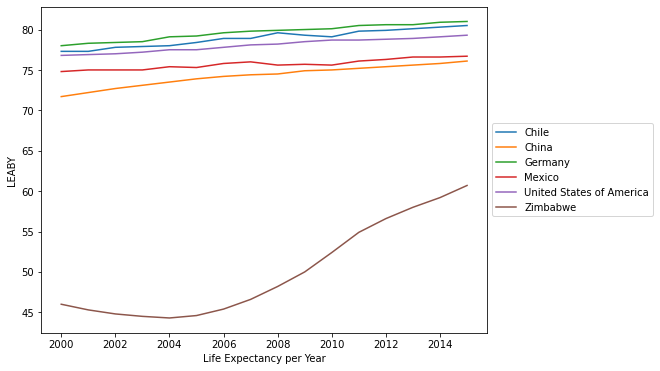

In [38]:
plt.figure(figsize=(8,6))
sns.lineplot(hue=df.Country, x=df.Year, y=df.LEABY)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xlabel('Life Expectancy per Year');

# GDP & LEABY Correlation per Country

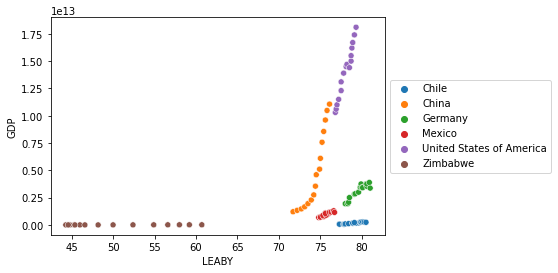

In [39]:
sns.scatterplot(hue=df.Country, x=df.LEABY, y=df.GDP)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);

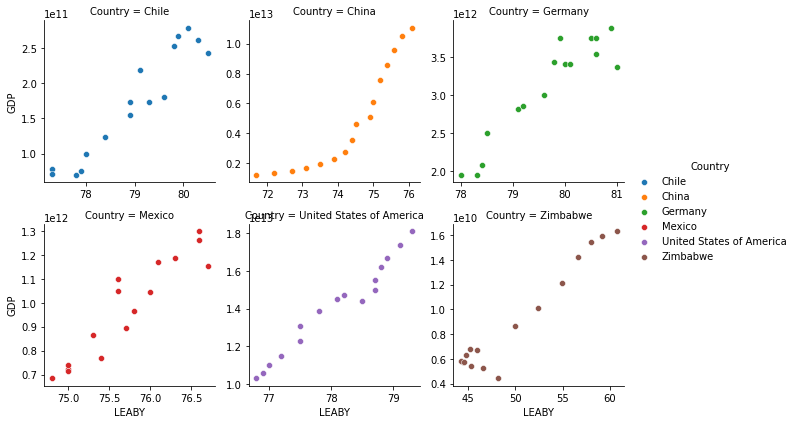

In [46]:
graph = sns.FacetGrid(df, col='Country', col_wrap=3, hue='Country', sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot, "LEABY", "GDP").add_legend().set_axis_labels("LEABY", "GDP"));

## Conclusion

- Has life expectancy increased over time in the six nations?
    - Yes with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - Yes with China having the highest increase.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes, the positive trend of GDP is effecting life expectancy in positive way.
- What is the average life expectancy in these nations?
    - Average life expectancy off all countries was around 70s except for Zimbabwe which was 50.
- What is the distribution of that life expectancy?
    - the life expectancy had a left skew, or most of the observations were on the right side.